# Python для сбора и анализа данных

*Алла Тамбовцева*

## Практикум 5. Обрабатываем посты ВКонтакте

В файле `final.xlsx` сохранены посты со стены сообщества Цитатник ВШЭ:

* `id`: id поста;
* `date`: дата-время публикации поста в формате POSIX;
* `text`: текст поста;
* `nlikes`: число лайков;
* `ncomments`: число комментариев. 

Загрузите данные из файла и сохраните их в датафрейм Pandas. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("final.xlsx")

In [3]:
df.head()

,Unnamed: 0,id,date,text,nlikes,ncomments
0,0,39858,1709297700,Историки - мы на вершине пирамиды. Все остальн...,57,2
1,1,39857,1709211300,"Очень большой поток, очень большой... Понимает...",143,0
2,2,39855,1709124900,*обсуждение тем городских исследований*\n\nП: ...,114,0
3,3,39852,1709038500,"«Я никому ничего не должна, как Анна Асти».\n\...",210,2
4,4,39848,1708952100,"""А я считаю, что женщина всегда права"".\n\n#Ма...",284,0


### Задача 1

Разбейте столбец `text` по символу `#`, чтобы получить три столбца:

* `words`: текст цитаты;
* `teacher`: имя преподавателя (как в тексте поста);
* `subject`: название курса/программы/факультета, где работает преподаватель (как в тексте поста).

Сам столбец `text` не удаляйте, просто добавьте новые три столбца к имеющемуся датафрейму. 

In [11]:
df["text"].str.split("#", expand = True).iloc[:, 0:3]

,0,1,2
0,Историки - мы на вершине пирамиды. Все остальн...,Стефанович_ВШЭ,НИС
1,"Очень большой поток, очень большой... Понимает...",Белов_ВШЭ,ИГР
2,*обсуждение тем городских исследований*\n\nП: ...,Дохов_ВШЭ,ТРГиИС
3,"«Я никому ничего не должна, как Анна Асти».\n\n",Таланов_ВШЭ,МПП
4,"""А я считаю, что женщина всегда права"".\n\n",Маскаева_ВШЭ,АдминистративноеПраво
...,...,...,...
9961,по маленькой кругленькой громов\n,"Громов_hse\n_____________________\nПожалуйста,...",None
9962,Все глоки суть куздры (Данько)\n,Данько_hse,None
9963,с какого бадуна ты это написал? (Самовол)\n,Самовол_hse,None
9964,Синдром яндекса (Шаповалов И. А)\n,Шаповалов_hse,None


In [12]:
# метод split() из модуля str внутри pandas
# expand = True – чтобы получить отдельные столбцы вместо одного со списками внутри

# .iloc[:, 0:3] – выбираем первые три столбца
# затем припысываем им названия из columns

new = df["text"].str.split("#", expand = True).iloc[:, 0:3]
new.columns = ["words", "teacher", "subject"]

In [13]:
df

,Unnamed: 0,id,date,text,nlikes,ncomments
0,0,39858,1709297700,Историки - мы на вершине пирамиды. Все остальн...,57,2
1,1,39857,1709211300,"Очень большой поток, очень большой... Понимает...",143,0
2,2,39855,1709124900,*обсуждение тем городских исследований*\n\nП: ...,114,0
3,3,39852,1709038500,"«Я никому ничего не должна, как Анна Асти».\n\...",210,2
4,4,39848,1708952100,"""А я считаю, что женщина всегда права"".\n\n#Ма...",284,0
...,...,...,...,...,...,...
9961,9961,6,1387918264,по маленькой кругленькой громов\n#Громов_hse\n...,6,0
9962,9962,5,1387917399,Все глоки суть куздры (Данько)\n#Данько_hse,19,2
9963,9963,4,1387917345,с какого бадуна ты это написал? (Самовол)\n#Са...,40,0
9964,9964,3,1387916061,Синдром яндекса (Шаповалов И. А)\n#Шаповалов_hse,24,0


In [14]:
# склеиваем старый датафрейм с новым
# по столбцам (axis = 1)

final = pd.concat([df, new], axis = 1)

In [15]:
final

,Unnamed: 0,id,date,text,nlikes,ncomments,words,teacher,subject
0,0,39858,1709297700,Историки - мы на вершине пирамиды. Все остальн...,57,2,Историки - мы на вершине пирамиды. Все остальн...,Стефанович_ВШЭ,НИС
1,1,39857,1709211300,"Очень большой поток, очень большой... Понимает...",143,0,"Очень большой поток, очень большой... Понимает...",Белов_ВШЭ,ИГР
2,2,39855,1709124900,*обсуждение тем городских исследований*\n\nП: ...,114,0,*обсуждение тем городских исследований*\n\nП: ...,Дохов_ВШЭ,ТРГиИС
3,3,39852,1709038500,"«Я никому ничего не должна, как Анна Асти».\n\...",210,2,"«Я никому ничего не должна, как Анна Асти».\n\n",Таланов_ВШЭ,МПП
4,4,39848,1708952100,"""А я считаю, что женщина всегда права"".\n\n#Ма...",284,0,"""А я считаю, что женщина всегда права"".\n\n",Маскаева_ВШЭ,АдминистративноеПраво
...,...,...,...,...,...,...,...,...,...
9961,9961,6,1387918264,по маленькой кругленькой громов\n#Громов_hse\n...,6,0,по маленькой кругленькой громов\n,"Громов_hse\n_____________________\nПожалуйста,...",None
9962,9962,5,1387917399,Все глоки суть куздры (Данько)\n#Данько_hse,19,2,Все глоки суть куздры (Данько)\n,Данько_hse,None
9963,9963,4,1387917345,с какого бадуна ты это написал? (Самовол)\n#Са...,40,0,с какого бадуна ты это написал? (Самовол)\n,Самовол_hse,None
9964,9964,3,1387916061,Синдром яндекса (Шаповалов И. А)\n#Шаповалов_hse,24,0,Синдром яндекса (Шаповалов И. А)\n,Шаповалов_hse,None


### Задача 2

Найдите преподавателя, чей пост набрал больше всего лайков, двумя способами:

* отсортировав строки по количеству лайков по убыванию;
* зафиксировав максимум и отфильтровав строки.

In [19]:
# первый способ: сортировка

final.sort_values("nlikes", ascending = False).reset_index().loc[0, "words"]

'Я получил письмо от вашей группы с просьбой посвятить следующий семинар характеристике текущей ситуации в российской экономике. Но для характеристики ситуации в российской экономике можно не тратить целый семинар, хватит всего одного слова. \n(Федоровых Д.А., эконом, 17.12.2014)\n'

In [20]:
# внимание: при сортировке номера строк не обновляются (в новом pandas точно)
# если хотим выбрать что-то из первой строки – самый универсальный способ

final.sort_values("nlikes", ascending = False).reset_index().loc[0, "teacher"]

'Федоровых_hse'

In [21]:
# второй способ

m = final["nlikes"].max()
final[final["nlikes"] == m]["words"]

8421    Я получил письмо от вашей группы с просьбой по...
Name: words, dtype: object

In [23]:
# сами слова

final[final["nlikes"] == m]["words"].values[0]

'Я получил письмо от вашей группы с просьбой посвятить следующий семинар характеристике текущей ситуации в российской экономике. Но для характеристики ситуации в российской экономике можно не тратить целый семинар, хватит всего одного слова. \n(Федоровых Д.А., эконом, 17.12.2014)\n'

### Задача 3

Напишите программу, которая запрашивает с клавиатуры названия трёх курсов/программ через запятую и сохраняет в файл Excel строки датафрейма, соответствующие запросу.

In [24]:
# посмотрим на сами значения и сколько раз они встречаются
# глобально, если дальше с этими данными работать, 
# нужно внимательно изучить эти значения и привести их к единому виду
# (философия -> Философия и подобное)

final["subject"].value_counts()

Философия              297
ИГПЗС                  144
философия              118
Социология              85
Психология              77
                      ... 
Sociological_Theory      1
Немецкий_язык            1
Актуарные_Расчёты        1
Каллиграфия              1
Кононенко_hse            1
Name: subject, Length: 1804, dtype: int64

In [25]:
# запрашиваем названия и превращаем в список
courses = input().split(",")
print(courses)

Философия,Социология,Психология
['Философия', 'Социология', 'Психология']


In [26]:
# метод isin() – входят ли значения в список courses
res = final[final["subject"].isin(courses)]
res.to_excel("results.xlsx")

### Задача 4

Добавьте в датафрейм столбец `date_time` с датой и временем поста в формате *datetime*. Хранить метку времени в таком формате удобно, так как, во-первых, дата и время представлены в понятном формате, а во-вторых, при сортировке или построении графиков для динамики строки будут упорядочиваться в правильном хронологическом порядке.

**Подсказка:** функция `.to_datetime()`.

In [27]:
# забираем метку времени в unix-формате – число секунд с 1 января 1970
# переводим в формат datateime из единиц измерения секунды

final["date_time"] = pd.to_datetime(final["date"], unit = "s")
final.head()

,Unnamed: 0,id,date,text,nlikes,ncomments,words,teacher,subject,date_time
0,0,39858,1709297700,Историки - мы на вершине пирамиды. Все остальн...,57,2,Историки - мы на вершине пирамиды. Все остальн...,Стефанович_ВШЭ,НИС,2024-03-01 12:55:00
1,1,39857,1709211300,"Очень большой поток, очень большой... Понимает...",143,0,"Очень большой поток, очень большой... Понимает...",Белов_ВШЭ,ИГР,2024-02-29 12:55:00
2,2,39855,1709124900,*обсуждение тем городских исследований*\n\nП: ...,114,0,*обсуждение тем городских исследований*\n\nП: ...,Дохов_ВШЭ,ТРГиИС,2024-02-28 12:55:00
3,3,39852,1709038500,"«Я никому ничего не должна, как Анна Асти».\n\...",210,2,"«Я никому ничего не должна, как Анна Асти».\n\n",Таланов_ВШЭ,МПП,2024-02-27 12:55:00
4,4,39848,1708952100,"""А я считаю, что женщина всегда права"".\n\n#Ма...",284,0,"""А я считаю, что женщина всегда права"".\n\n",Маскаева_ВШЭ,АдминистративноеПраво,2024-02-26 12:55:00


### Задача 5

Проделайте аналогичную операцию с метками времени, только представьте их не в формате *datetime*, а в виде обычных строк (тип *object*, который в Pandas соответствует базовому типу *string*). Используя форматирование строк для дат, извлеките название месяца и название дня недели и сохраните их в столбцы `month` и `weekday` соответственно.

In [31]:
# вспомните про форматирование дат (первая неделя)

final["month"] = final["date_time"].dt.strftime("%B")
final["weekday"] = final["date_time"].dt.strftime("%A")

final.loc[:, "date_time":].head()

,date_time,month,weekday
0,2024-03-01 12:55:00,March,Friday
1,2024-02-29 12:55:00,February,Thursday
2,2024-02-28 12:55:00,February,Wednesday
3,2024-02-27 12:55:00,February,Tuesday
4,2024-02-26 12:55:00,February,Monday


### Задача 6

Сгруппируйте строки по дням недели и определите, в какие дни недели:

* публикуется больше всего/меньше всего постов;
* посты получают наибольшее/наименьшее число комментариев.

In [36]:
final.groupby("weekday")["id"].count()

weekday
Friday       1416
Monday       1351
Saturday     1339
Sunday       1223
Thursday     1507
Tuesday      1550
Wednesday    1580
Name: id, dtype: int64

In [37]:
# группируем по weekday
# забираем столбец id и считаем число заполненных ячеек в нем
# затем сортируем

final.groupby("weekday")["id"].count().sort_values(ascending=False)

weekday
Wednesday    1580
Tuesday      1550
Thursday     1507
Friday       1416
Monday       1351
Saturday     1339
Sunday       1223
Name: id, dtype: int64

In [39]:
# группируем по weekday
# забираем столбец ncomments, считаем сумму

final.groupby("weekday")["ncomments"].agg("sum").sort_values(ascending=False)

weekday
Tuesday      1585
Wednesday    1486
Thursday     1377
Friday       1235
Monday       1229
Sunday       1156
Saturday     1117
Name: ncomments, dtype: int64

### Задача 7

Выберите строки датафрейма, которые соответствуют постам за 2023 год и сохраните их в датфрейм `small`. 
Добавьте в датафрейм `small` столбец `module`, который соответствует номеру модуля обучения в Вышке (см. академический [календарь](https://www.hse.ru/studyspravka/grafik/)).



In [46]:
# менее универсальный вариант (в новом pandas не работает), но красивый
# pandas в более старой версии позволял делать сравнение дат через строки

small = final[(final["date_time"] >= "2023-01-01") & (final["date_time"] <= "2023-12-31")]

In [47]:
# более универсальный вариант, для нового pandas подходит
# специальный формат Timestamp

small = final[(final["date_time"] >= pd.Timestamp(2023, 1, 1)) & (final["date_time"] <= pd.Timestamp(2023, 12, 31))]
small.loc[:, "words":].head()

,words,teacher,subject,date_time,month,weekday
59,"Если вы сможете доказать, есть ли что-то между...",Сахарова_ВШЭ,None,2023-12-30 11:50:00,December,Saturday
60,Принцип нашего банкротного права: “Если хилый ...,Иванов_ВШЭ,Гражданское_право,2023-12-29 11:50:00,December,Friday
61,Образование - это всегда насилие.\n\n,Цифровая_картография_и_геоинформационныесистемы,Башир_ВШЭ,2023-12-28 11:50:00,December,Thursday
62,«Убийство – это хорошо. С точки зрения русског...,Соболева_ВШЭ,ПРЮ,2023-12-27 14:50:00,December,Wednesday
63,"""Размер имеет значение, знаете ли"".\n\n",Черников_ВШЭ,None,2023-12-24 11:55:00,December,Sunday


In [42]:
# пишем функцию для модуля
# 1 или 2, 0 на всякий случай

def get_module(x):
    if x >= pd.Timestamp(2023, 9, 1) and x <= pd.Timestamp(2023, 11, 1):
        y = 1
    elif x >= pd.Timestamp(2023, 11, 2) and x <= pd.Timestamp(2023, 12, 31):
        y = 2
    else:
        y = 0
    return y

In [43]:
# применяем функцию к столбцу с датами

small["module"] = small["date_time"].apply(get_module)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
# предупреждение выше – работаем с копиями столбцов ради сохранности данных
# это нормально, но во избежание предупреждения более корректный код такой

small.loc[:, "module"] = small.loc[:, "date_time"].apply(get_module)

In [50]:
# код для отключения предупреждения
pd.options.mode.chained_assignment = None

### Задача 8

Выберите строки датафрейма, который соответствуют первому модулю 2023-2024 учебного года и постройте для полученного датафрейма график, отражающий динамику числа лайков в течение модуля (по горизонтальной оси дата, по вертикальной – суммарное число лайков в день).

In [52]:
# проверяем значения
# 0 – нормально, есть еще 3-4 модули прошлого учебного года

small["module"].value_counts()

0    232
1     61
2     60
Name: module, dtype: int64

In [53]:
# выбираем первый модуль
mod01 = small[small["module"] == 1]

In [55]:
# добавляем столбцец с днем (число месяца)
mod01["day"] = mod01["date_time"].dt.strftime("%Y-%m-%d")

In [56]:
# группируем и считаем сумму лайков по дням
res = mod01.groupby("day")["nlikes"].sum()
res.head()

day
2023-09-01    266
2023-09-08    340
2023-09-09    117
2023-09-10     76
2023-09-11    403
Name: nlikes, dtype: int64

In [62]:
# в x даты, в y частоты
x = list(res.index)
y = list(res.values)

In [63]:
from matplotlib import pyplot as plt

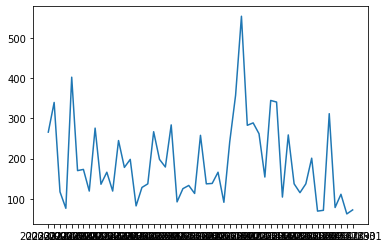

In [65]:
plt.plot(x, y);

Вообще график `matplotlib` состоит из двух частей:

* «рамка» для картинки (обычно сохраняется в переменную `fig`);
* поле с осями, внутри которого строится график (обычно сохраняется в переменную `ax`).

Так, мы можем воспользоваться функцией `subplots()` и сообщить Python, что мы хотим получить картинку размера 16 на 9 дюймов с разрешением 300 точек на дюйм (`dpi` – dots per inch):

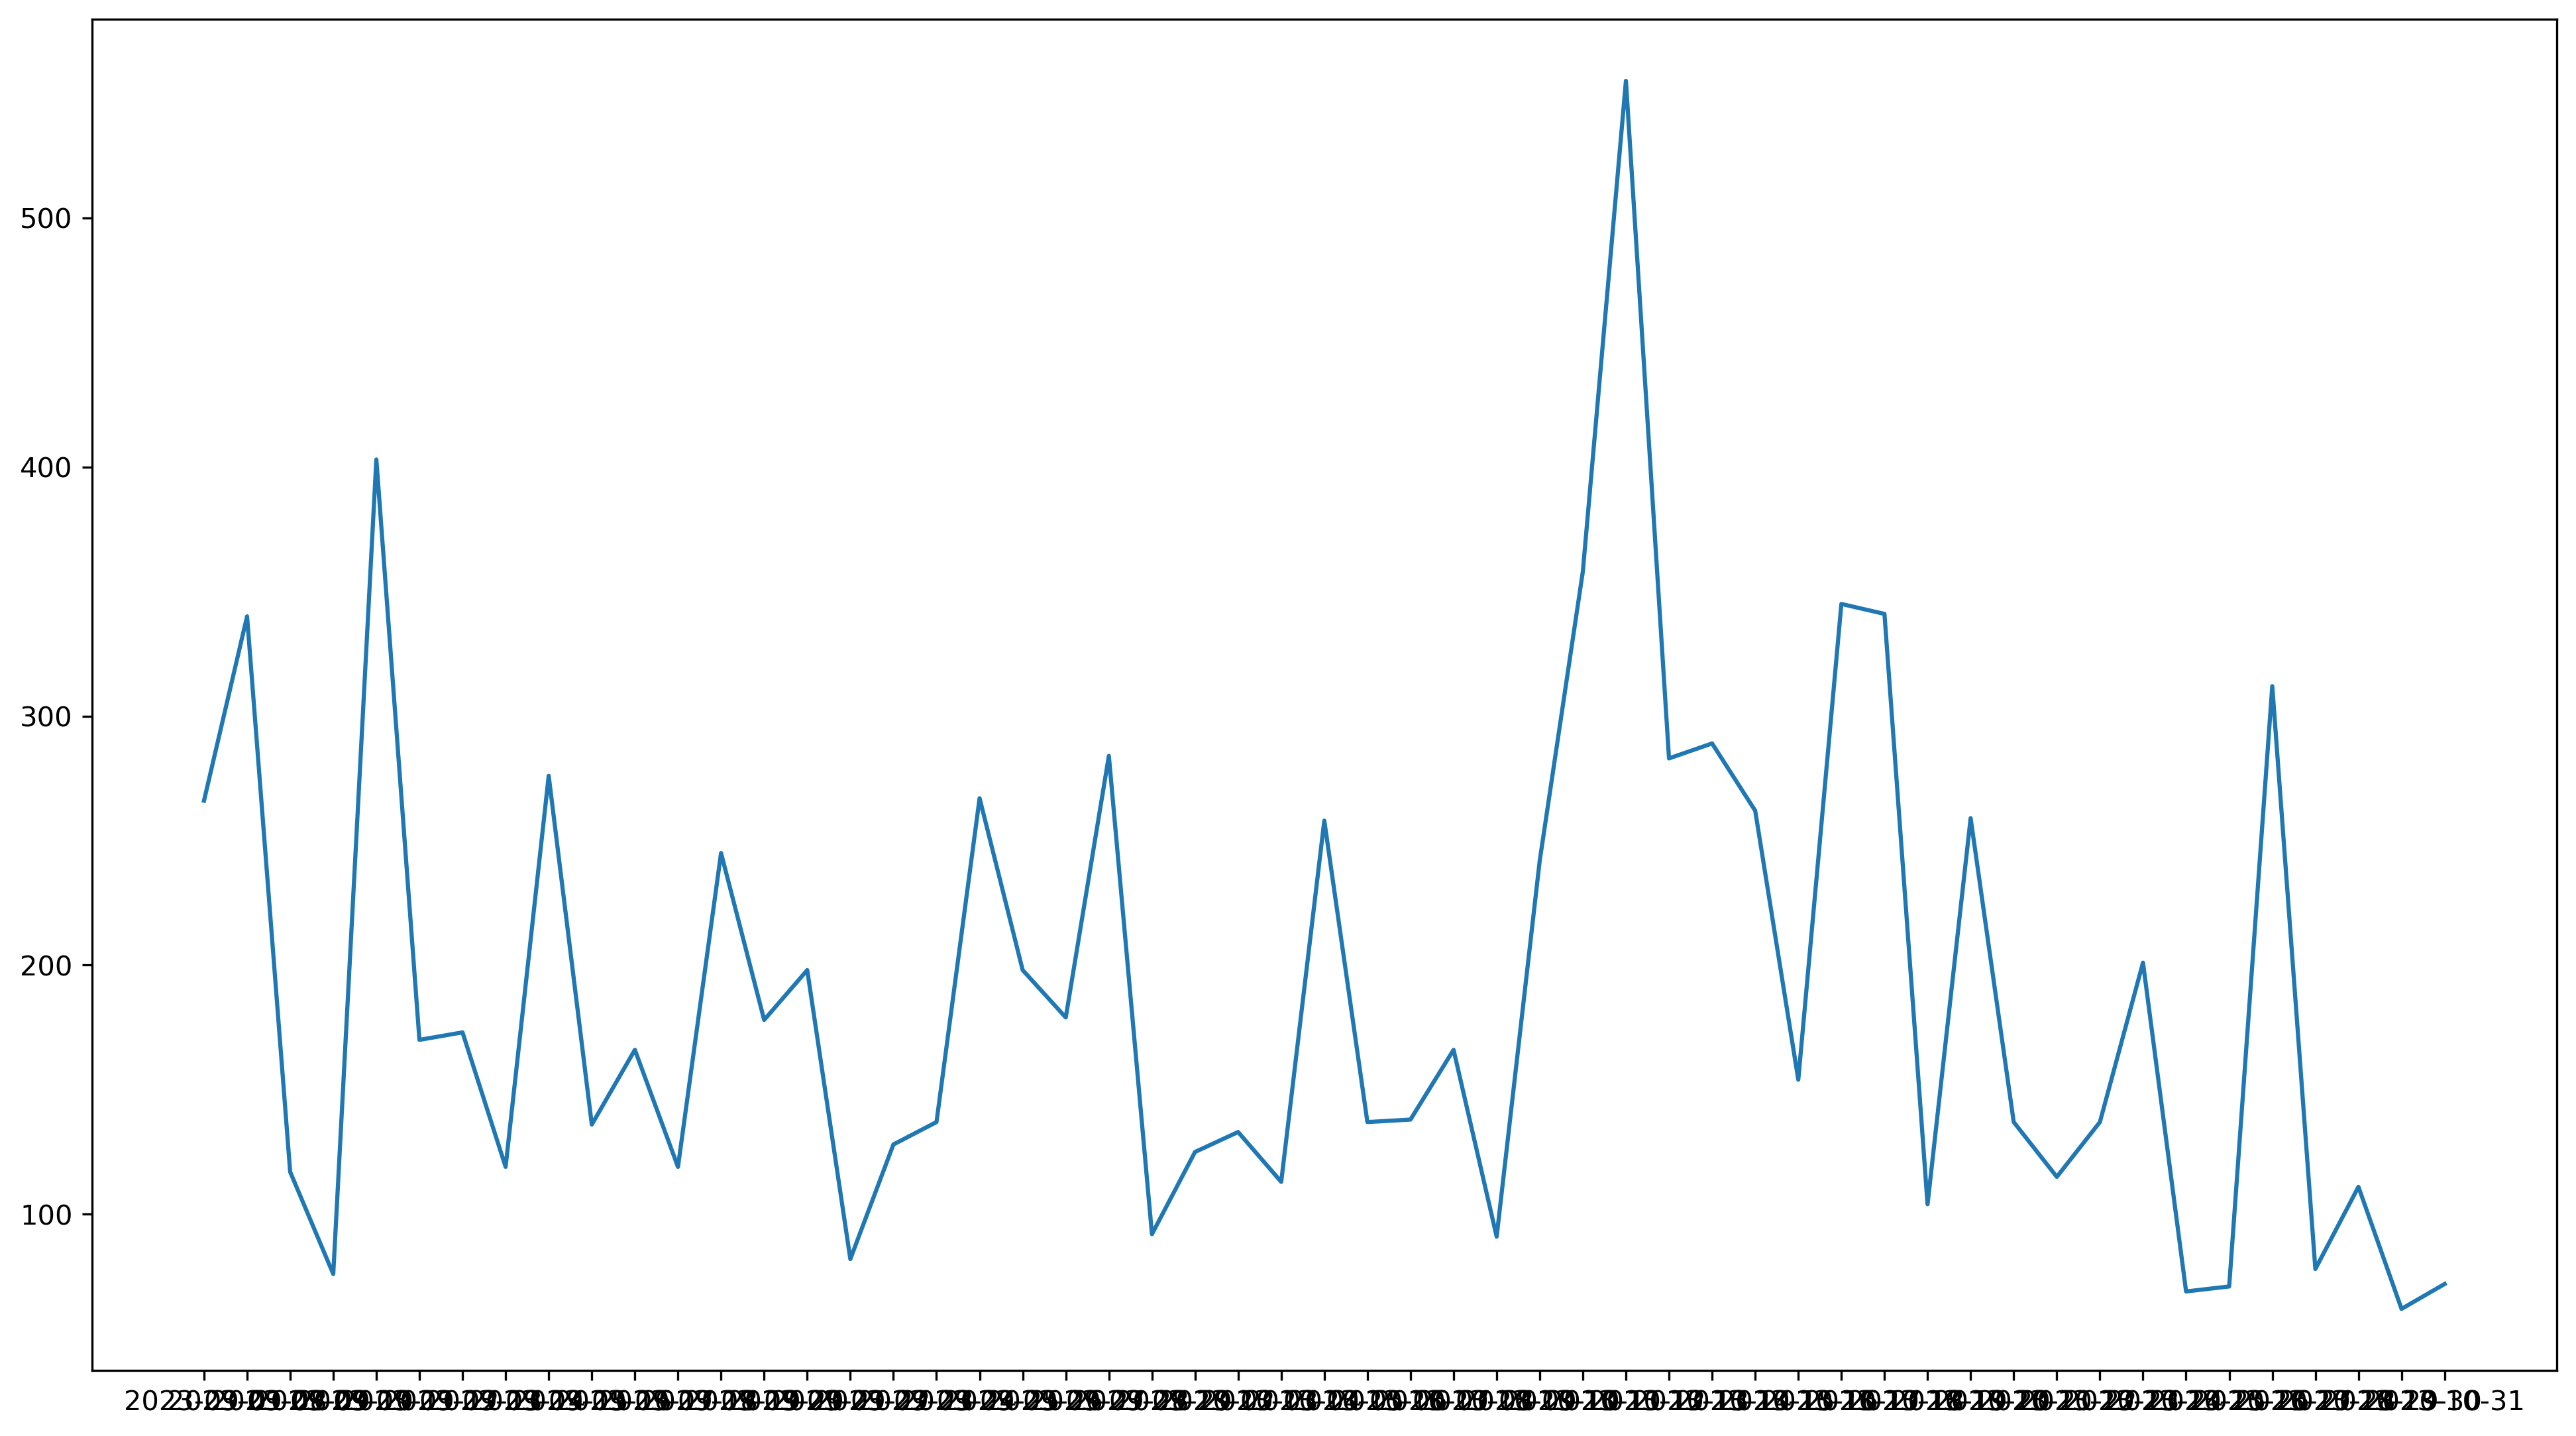

In [66]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
ax.plot(x, y);

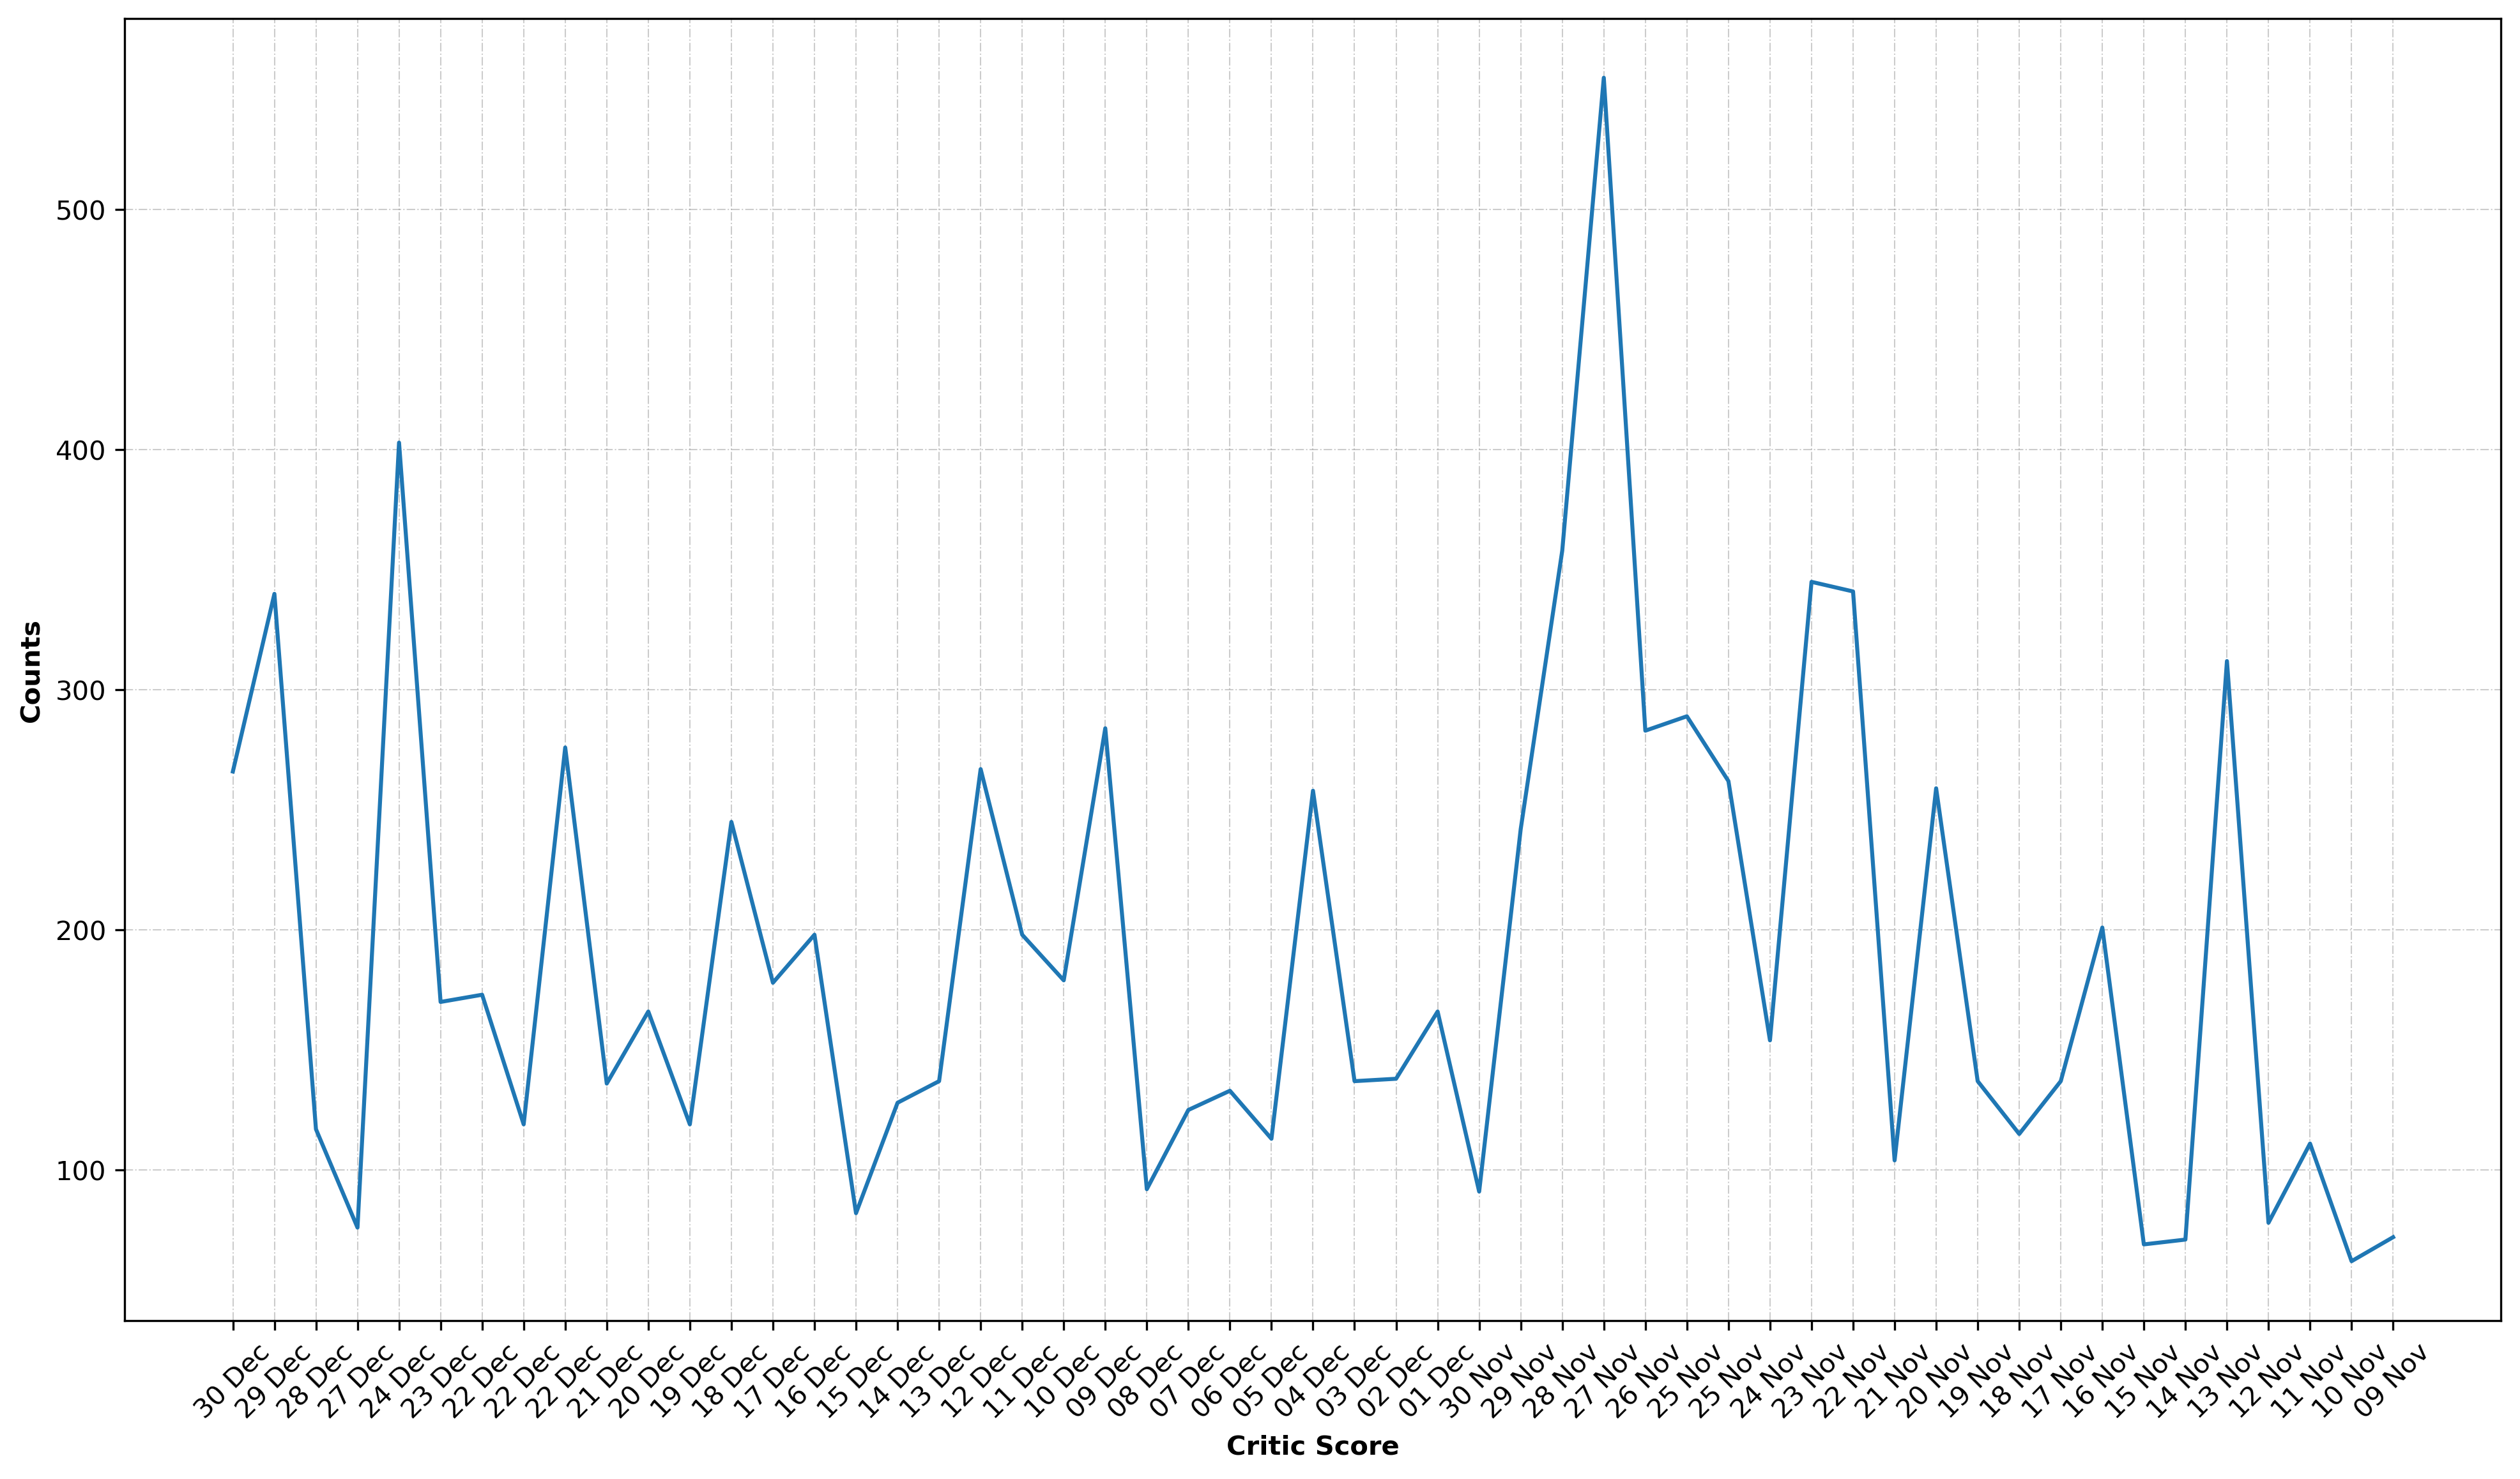

In [67]:
# дорабатываем график

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
ax.plot(x, y);

# настройка координатной сетки (alpha – прозрачность)
ax.grid(color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);

# подписи к осям (полужирный шрифт)
ax.set_xlabel("Critic Score", fontweight = 'bold');
ax.set_ylabel("Counts", fontweight = 'bold');

# подписи к значениям по оси x
# поворачиваем на 45 градусов
# в подписи set_xticklabels помещаем не всю дату,
# а только день и месяц в сокращенном виде

ax.set_xticklabels(small["date_time"].apply(lambda x: x.strftime("%d %b")));
ax.tick_params(axis = 'x', labelrotation = 45);

In [68]:
fig.savefig("plot.png")

### Задача 9

Выберите строки датафрейма, соответствующие постам, число комментариев к которым больше 0. Переименуйте столбец `id` в `post_id`. 

In [69]:
with_comm = small[small["ncomments"] > 0]

In [70]:
with_comm.rename(columns = {"id" : "post_id"}, inplace = True)
with_comm.head()

,Unnamed: 0,post_id,date,text,nlikes,ncomments,words,teacher,subject,date_time,month,weekday,module
59,59,39629,1703937000,"Если вы сможете доказать, есть ли что-то между...",122,1,"Если вы сможете доказать, есть ли что-то между...",Сахарова_ВШЭ,None,2023-12-30 11:50:00,December,Saturday,2
61,61,39626,1703764200,Образование - это всегда насилие.\n\n#Цифровая...,291,1,Образование - это всегда насилие.\n\n,Цифровая_картография_и_геоинформационныесистемы,Башир_ВШЭ,2023-12-28 11:50:00,December,Thursday,2
62,62,39624,1703688600,«Убийство – это хорошо. С точки зрения русског...,102,1,«Убийство – это хорошо. С точки зрения русског...,Соболева_ВШЭ,ПРЮ,2023-12-27 14:50:00,December,Wednesday,2
67,67,39600,1703246100,Лекция - это акт любви. А записывать акты любв...,501,6,Лекция - это акт любви. А записывать акты любв...,Каспэ_ВШЭ,Политология,2023-12-22 11:55:00,December,Friday,2
69,69,39595,1703073300,"""На лекции уже прилично так людей, целых 15"".\...",340,1,"""На лекции уже прилично так людей, целых 15"".\n",Скриба_ВШЭ,геополитика,2023-12-20 11:55:00,December,Wednesday,2


### Задача 10*

Используя API ВКонтакте, выгрузите комментарии к каждому посту в датафрейме, полученном в предыдущей задаче, и сохраните их в виде датафрейма. В датафрейме с комментариями должна остаться следующая информация: 

* id комментария;
* дата комментария;
* текст комментария;
* id пользователя, который оставил комментарий.

Объедините датафреймы с постами и с комментариями по id поста таким образом, чтобы в итоговом датафрейме одна строка соответствовала одному комментарию (комментарии уникальны, посты не уникальны, так как одному посту может соответствовать несколько комментариев).

In [ ]:
# получение токена – см практикум 3.2
# чтобы никто не видел ваши id/token импортируем getpass()
# аналог input(), введенное значение сохраняется, но отображается в виде точек как пароль

In [78]:
import requests
from getpass import getpass

In [81]:
app_id = getpass("Enter your client id: ")
url = f"https://oauth.vk.com/authorize?client_id={app_id}&display=page&redirect_uri=http://oauth.vk.com/blank.html&scope=all&response_type=token"
# print(url)

Enter your client id: ········


In [83]:
full_link = getpass()
token = full_link.split("access_token=")[1].split("&")[0]

········


In [ ]:
# вспоминаем выгрузку самих постов – метод wall.get
# и находим id сообщества с названием hseteachers

In [84]:
v = "5.131"
domain = "hseteachers"
main_wall = "https://api.vk.com/method/wall.get"

In [86]:
params_wall = {"access_token" : token, "domain" : domain, "v" : v}
req_wall = requests.get(main_wall, params = params_wall)
json_wall = req_wall.json()

print(json_wall['response']['items'][0]["from_id"])

-63442801


In [ ]:
# переключаемся на комментарии – уже другой метод getComments
# https://dev.vk.com/ru/method/wall.getComments

In [92]:
main_comm = "https://api.vk.com/method/wall.getComments"

In [93]:
ids = list(with_comm["post_id"])
print(ids[0:5])
print(len(ids))

[39629, 39626, 39624, 39600, 39595]
187


In [94]:
with_comm["ncomments"].max()

11

In [95]:
from time import sleep

In [97]:
comments_all = []

for i in ids:
    params_comm = {"owner_id" : -63442801,
              "post_id" : i,
              "v" : v,
              "access_token" : token,
              "count" : 11}
    req = requests.get(main_comm, params = params_comm)
    comm_json = req.json()
    comm_list = comm_json["response"]["items"]
    comments_all.extend(comm_list)
    sleep(1)

In [98]:
df_comm = pd.DataFrame(comments_all)

In [100]:
comments = df_comm[["id", "from_id", "date", "text", "post_id"]]
comments.head()

,id,from_id,date,text,post_id
0,39632,222892621,1704027915,"Боюсь, вы попадете в психушку :)",39629
1,39628,75075664,1703857146,Так и есть,39626
2,39625,393994812,1703702546,Нужно объяснение. Пхпхп,39624
3,39601,498855815,1703253620,А что такое семинары?,39600
4,39597,192676130,1703175843,Отец,39595


In [101]:
comments.rename(columns = {"from_id": "user_id"}, inplace = True)
comments.head()

,id,user_id,date,text,post_id
0,39632,222892621,1704027915,"Боюсь, вы попадете в психушку :)",39629
1,39628,75075664,1703857146,Так и есть,39626
2,39625,393994812,1703702546,Нужно объяснение. Пхпхп,39624
3,39601,498855815,1703253620,А что такое семинары?,39600
4,39597,192676130,1703175843,Отец,39595


In [102]:
with_comm.head()

,Unnamed: 0,post_id,date,text,nlikes,ncomments,words,teacher,subject,date_time,month,weekday,module
59,59,39629,1703937000,"Если вы сможете доказать, есть ли что-то между...",122,1,"Если вы сможете доказать, есть ли что-то между...",Сахарова_ВШЭ,None,2023-12-30 11:50:00,December,Saturday,2
61,61,39626,1703764200,Образование - это всегда насилие.\n\n#Цифровая...,291,1,Образование - это всегда насилие.\n\n,Цифровая_картография_и_геоинформационныесистемы,Башир_ВШЭ,2023-12-28 11:50:00,December,Thursday,2
62,62,39624,1703688600,«Убийство – это хорошо. С точки зрения русског...,102,1,«Убийство – это хорошо. С точки зрения русског...,Соболева_ВШЭ,ПРЮ,2023-12-27 14:50:00,December,Wednesday,2
67,67,39600,1703246100,Лекция - это акт любви. А записывать акты любв...,501,6,Лекция - это акт любви. А записывать акты любв...,Каспэ_ВШЭ,Политология,2023-12-22 11:55:00,December,Friday,2
69,69,39595,1703073300,"""На лекции уже прилично так людей, целых 15"".\...",340,1,"""На лекции уже прилично так людей, целых 15"".\n",Скриба_ВШЭ,геополитика,2023-12-20 11:55:00,December,Wednesday,2


In [103]:
final01 = with_comm.merge(comments, on = "post_id", how = "left")
final01.head(20)

,Unnamed: 0,post_id,date_x,text_x,nlikes,ncomments,words,teacher,subject,date_time,month,weekday,module,id,user_id,date_y,text_y
0,59,39629,1703937000,"Если вы сможете доказать, есть ли что-то между...",122,1,"Если вы сможете доказать, есть ли что-то между...",Сахарова_ВШЭ,None,2023-12-30 11:50:00,December,Saturday,2,39632,222892621,1704027915,"Боюсь, вы попадете в психушку :)"
1,61,39626,1703764200,Образование - это всегда насилие.\n\n#Цифровая...,291,1,Образование - это всегда насилие.\n\n,Цифровая_картография_и_геоинформационныесистемы,Башир_ВШЭ,2023-12-28 11:50:00,December,Thursday,2,39628,75075664,1703857146,Так и есть
2,62,39624,1703688600,«Убийство – это хорошо. С точки зрения русског...,102,1,«Убийство – это хорошо. С точки зрения русског...,Соболева_ВШЭ,ПРЮ,2023-12-27 14:50:00,December,Wednesday,2,39625,393994812,1703702546,Нужно объяснение. Пхпхп
3,67,39600,1703246100,Лекция - это акт любви. А записывать акты любв...,501,6,Лекция - это акт любви. А записывать акты любв...,Каспэ_ВШЭ,Политология,2023-12-22 11:55:00,December,Friday,2,39601,498855815,1703253620,А что такое семинары?
4,69,39595,1703073300,"""На лекции уже прилично так людей, целых 15"".\...",340,1,"""На лекции уже прилично так людей, целых 15"".\n",Скриба_ВШЭ,геополитика,2023-12-20 11:55:00,December,Wednesday,2,39597,192676130,1703175843,Отец
5,73,39584,1702727700,"Коллеги, всю следующую пару будем с вами думат...",326,2,"Коллеги, всю следующую пару будем с вами думат...",Лукина_ВШЭ,ШД,2023-12-16 11:55:00,December,Saturday,2,39585,154526243,1702728124,я люблю ее....
6,73,39584,1702727700,"Коллеги, всю следующую пару будем с вами думат...",326,2,"Коллеги, всю следующую пару будем с вами думат...",Лукина_ВШЭ,ШД,2023-12-16 11:55:00,December,Saturday,2,39586,493046175,1702728253,"Странно, что не Алмазова"
7,74,39578,1702641300,"*студенты спросили преподавателя, почему он по...",940,5,"*студенты спросили преподавателя, почему он по...",Пучков_ВШЭ,Новейшая_мировая_история,2023-12-15 11:55:00,December,Friday,2,39579,493046175,1702641837,Павел Андреевич в своем стиле)
8,74,39578,1702641300,"*студенты спросили преподавателя, почему он по...",940,5,"*студенты спросили преподавателя, почему он по...",Пучков_ВШЭ,Новейшая_мировая_история,2023-12-15 11:55:00,December,Friday,2,39580,323097616,1702645035,"Ставь лайк, если представил то самое черно-бел..."
9,74,39578,1702641300,"*студенты спросили преподавателя, почему он по...",940,5,"*студенты спросили преподавателя, почему он по...",Пучков_ВШЭ,Новейшая_мировая_история,2023-12-15 11:55:00,December,Friday,2,39581,221889909,1702650925,


In [105]:
final01.rename(columns={"date_x" : "post_date", 
                        "date_y" : "comment_date", 
                        "text_x" : "post_text", 
                        "text_y": "comment_text",
                        "id" : "comment_id"}, inplace = True)
final01.head()

,Unnamed: 0,post_id,post_date,post_text,nlikes,ncomments,words,teacher,subject,date_time,month,weekday,module,comment_id,user_id,comment_date,comment_text
0,59,39629,1703937000,"Если вы сможете доказать, есть ли что-то между...",122,1,"Если вы сможете доказать, есть ли что-то между...",Сахарова_ВШЭ,None,2023-12-30 11:50:00,December,Saturday,2,39632,222892621,1704027915,"Боюсь, вы попадете в психушку :)"
1,61,39626,1703764200,Образование - это всегда насилие.\n\n#Цифровая...,291,1,Образование - это всегда насилие.\n\n,Цифровая_картография_и_геоинформационныесистемы,Башир_ВШЭ,2023-12-28 11:50:00,December,Thursday,2,39628,75075664,1703857146,Так и есть
2,62,39624,1703688600,«Убийство – это хорошо. С точки зрения русског...,102,1,«Убийство – это хорошо. С точки зрения русског...,Соболева_ВШЭ,ПРЮ,2023-12-27 14:50:00,December,Wednesday,2,39625,393994812,1703702546,Нужно объяснение. Пхпхп
3,67,39600,1703246100,Лекция - это акт любви. А записывать акты любв...,501,6,Лекция - это акт любви. А записывать акты любв...,Каспэ_ВШЭ,Политология,2023-12-22 11:55:00,December,Friday,2,39601,498855815,1703253620,А что такое семинары?
4,69,39595,1703073300,"""На лекции уже прилично так людей, целых 15"".\...",340,1,"""На лекции уже прилично так людей, целых 15"".\n",Скриба_ВШЭ,геополитика,2023-12-20 11:55:00,December,Wednesday,2,39597,192676130,1703175843,Отец


### Задача 11*

Используя API ВКонтакте, выгрузите следующую информацию по пользователям, оставившим комментарии к постам, то есть по тем пользователям, чей id зафиксирован в датафрейме, полученном в предыдущей задаче:
 
* имя пользователя;
* вуз (если указан).

«Подтяните» полученную информацию к датафрейму с комментариями, то есть добавьте туда столбцы с именем пользователя и вузом. 

In [108]:
j = "allatamb"

In [110]:
main_user = "https://api.vk.com/method/users.get"

params_user = {"access_token" : token, 
               "v" : v, 
               "user_id" : j,
               "fields" : "bdate,city,home_town,universities"
}
req2 = requests.get(main_user, params = params_user)
req2.json()

{'response': [{'id': 20473269,
   'bdate': '25.3.1994',
   'city': {'id': 1, 'title': 'Москва'},
   'home_town': 'Москва',
   'universities': [{'city': 1,
     'country': 1,
     'education_status': 'Студентка (бакалавр)',
     'education_status_id': 3,
     'graduation': 2016,
     'id': 128,
     'name': 'НИУ ВШЭ (ГУ-ВШЭ)'}],
   'first_name': 'Алла',
   'last_name': 'Тамбовцева',
   'can_access_closed': True,
   'is_closed': False}]}

In [111]:
users = []

for j in final01["user_id"]:
    
    params_user = {"access_token" : token,
               "v" : v,
               "user_id" : j,
               "fields" : "universities"}
    
    req2 = requests.get(main_user, params = params_user)
    users_json = req2.json()
    items_users = users_json['response']
    users.extend(items_users)
    sleep(1)

In [115]:
df_users = pd.DataFrame(users)
df_users

,id,first_name,last_name,can_access_closed,is_closed,universities,deactivated
0,222892621,Юрий,Зорин,True,False,NaN,NaN
1,75075664,Ая,Криман,False,True,NaN,NaN
2,393994812,Алиса,Кристон,False,True,NaN,NaN
3,498855815,Георгий,Панаиотов,True,False,"[{'city': 1, 'country': 0, 'id': 128, 'name': ...",NaN
4,192676130,Глеб,Попов,False,True,NaN,NaN
...,...,...,...,...,...,...,...
321,33813518,Люда,Суркова,True,False,NaN,NaN
322,351873898,Максим,Боднарь,True,False,NaN,NaN
323,204050303,Дмитрий,Маруга,True,False,"[{'chair': 2037673, 'chair_name': 'Социология'...",NaN
324,480123269,Дмитрий,Татьянченко,True,False,NaN,deleted


In [116]:
import numpy as np

In [117]:
def get_univ(x):
    if type(x) is float or len(x) == 0:
        y = np.nan
    else:
        names = [i["name"] for i in x]
        y = "|".join(names)
    return y

In [119]:
df_users["university_name"] = df_users["universities"].apply(get_univ)

In [122]:
users_small = df_users[["id", "first_name", "last_name", "university_name"]]

In [123]:
users_small.rename(columns = {"id" : "user_id"}, inplace = True)

In [125]:
final02 = final01.merge(users_small, on = "user_id", how = "left")

In [126]:
final02["university_name"].value_counts()

ВА РВСН им. Петра Великого (бывш. ВА им. Ф. Э. Дзержинского)             144
НИУ ВШЭ (ГУ-ВШЭ)                                                          43
НИУ ВШЭ (ГУ-ВШЭ)|РГУ нефти и газа (НИУ) им. И. М. Губкина                 25
РГГУ|МИПК РЭУ им. Г. В. Плеханова|НИ ВШУ|МГУ|РГГУ|НИУ ВШЭ (ГУ-ВШЭ)        25
МГУ                                                                       14
НИУ ВШЭ (СПб)                                                             14
НИУ ВШЭ – НН                                                               5
МГЮА (Университет им. О. Е. Кутафина)                                      2
ГАУГН (бывш. ГУГН, РЦГО)                                                   1
МИЭМ НИУ ВШЭ                                                               1
ЧГПУ им. И. Я. Яковлева                                                    1
УУНиТ                                                                      1
НИУ ВШЭ - Пермь                                                            1